# <center>Data Visualization in Python - Primeiros Passos </center>


<p align="justify">
    Visualização de Dados pode ser considerada a disciplina de tentar entender os dados colocando-os em um contexto visual, para que padrões e correlações possam ser identificados quando de outra maneira seria praticamente impossivel encontra-los. 

Atualmente existem diversas bibliotecas em Python para plotagem de graficos, cada uma contendo uma enorme quantidade de <u><strong>features</strong></u> independentes. Fazendo com que não importa o tipo de gráfico que você deseje, Python terá uma excelente biblioteca disponivel.

Dentre as bibliotecas disponiveis, as mais utilizadas são:
<ul>
    <li> <u><b>Matplotlib</u></b>: Baixo nível, permitindo uma maior liberdade.</li>
    <li> <u><b>Pandas Visualization</u></b>: Fácil de usar, construida em cima do Matplotlib.</li>
    <li> <u><b>Seaborn</u></b>: Interface de alto nível, estilos pré definidos.</li>
    <li> <u><b>ggplot</u></b>: Baseado no ggplot2 do R, utiliza <a href='https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448'>Grammar of Graphics.</a> </li>
    <li> <u><b>Plotly</u></b>: Criação de gráficos interativos.</li>
</ul>
</p>

In [80]:
'''
    Importando datasets!
    Ambos os conjuntos de dados são disponibilizados gratuitamente e são amplamente 
    utilizados para aprendizados e testes
    
    https://archive.ics.uci.edu/ml/datasets/iris
    https://www.kaggle.com/zynicide/wine-reviews
    
'''
import pandas as pd
iris = pd.read_csv('iris.csv')
wine = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

In [81]:
print(iris.tail()) # Ultimos 5 registros da Dataframe

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [82]:
print(wine.head()) # Primeiros 5 registros do Dataframe

    country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN

## Matplotlib

Matplotlib é a bliblioteca mais popular e amplamente utlizada disponivel para Python. É uma biblioteca de baixo nivel com a interface muito parecida com o Matlab, oferece muito mais liberdade na construção de gráficos ao custo de que é necessário escrever mais linhas de código.

Pode ser instalada utilizando o comando:

> pip install matplotlib

In [85]:
# Import library
import matplotlib.pyplot as plt

##### Scatter Plot

Para criar um gráfico de dispersão no Matplotlib, podemos usar o método de dispersão <strong>scatter</strong>. Também criaremos uma figura e um eixo utilizando as funcoes <u>plt.subplots</u>, para que possamos atribuir ao gráfico um título e rótulos.

Text(0, 0.5, 'sepal_width')

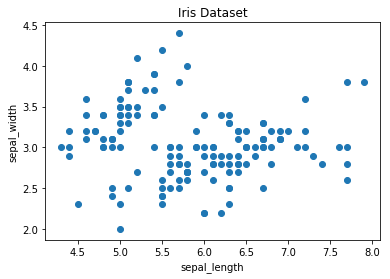

In [88]:
# create a figure and axis
fig, ax = plt.subplots() # create a image canvas

# scatter the sepal_length
ax.scatter(iris['sepal_length'], iris['sepal_width'])

# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

Podemos dar ao gráfico um maior significado adicionando uma cor diferente para cada uma das classes dentro do conjunto de dados. Isto pode ser feito criando um dicionário que irá mapear uma cor para cada classe utilizando um <strong>for-loop</strong> para a plotagem da disperção.

Text(0, 0.5, 'sepal_width')

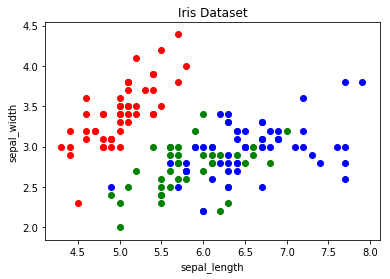

In [89]:
# creating the dictionary 
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}

# craete figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i], color=colors[iris['species'][i]])
    
# set graphic labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

##### Line Chart

Utilizando matplotlib podemos criar um gráfico de linha chamando o método <strong>plot</strong>. Podemos plotar multiplas colunas em um único gráfico através de um loop envolvendo todas as colunas no conjunto de dados. Podendo assim plotar cada coluna no mesmo eixo do gráfico.


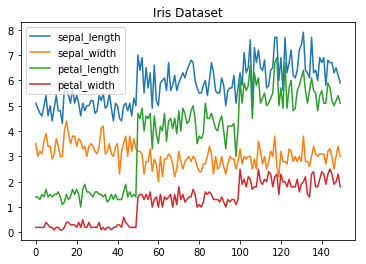

In [21]:
# get columns
columns = iris.columns.drop(['species'])

# create x data
x_data = range(0, iris.shape[0])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
    
ax.set_title('Iris Dataset')
ax.legend()
    

In [19]:
print(columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


##### Histograma
Histogramas podem ser criados utilizando o método <strong>hist</strong>. Se passamos para o método dados do tipo categóricos como a coluna 'points' do conjunto de dados wine-review, o método irá calcular automaticamente a ocorrência de cada valor.

Text(0, 0.5, 'Frequency')

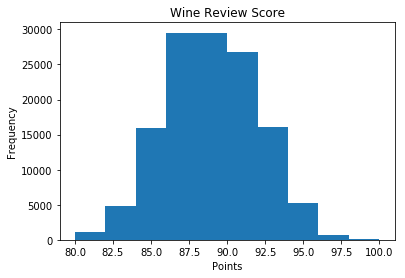

In [24]:
# create figure and axis
fig, ax = plt.subplots()

# plot histogram
ax.hist(wine['points'])

# set labels
ax.set_title('Wine Review Score')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

##### Bar Chart
A bar chart can be created using the <strong>bar</strong> method. The bar-chart isn’t automatically calculating the frequency of a category so we are going to use pandas value_counts function to do this. The bar-chart is useful for categorical data that doesn’t have a lot of different categories (less than 30) because else it can get quite messy.

Text(0, 0.5, 'Frequency')

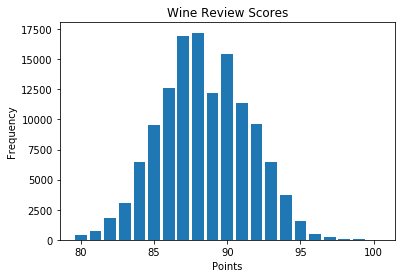

In [28]:
fig, ax = plt.subplots()

# count the occurrence of each class
data = wine['points'].value_counts()

# get x and y data
points = data.index
frequency = data.values

# create bar plot
ax.bar(points, frequency)

# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

# Pandas Visualization
Pandas is an open source high-performance, easy-to-use library providing data structures, such as dataframes, and data analysis tools like the visualization tools we will use in this article.
Pandas Visualization makes it really easy to create plots out of a pandas dataframe and series. It also has a higher level API than Matplotlib and therefore we need less code for the same results.
Pandas can be installed using either pip or conda.

##### Scatter Plot
To create a scatter plot in Pandas we can call <strong>dataset_name.plot.scatter()</strong> and pass it two arguments, the name of the x-column as well as the name of the y-column. Optionally we can also pass it a title.

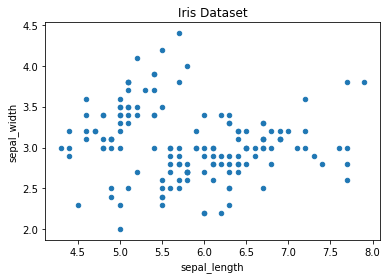

In [29]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

##### Line Chart
To create a line-chart in Pandas we can call <strong>dataset_name.plot.line()</strong>. Whilst in Matplotlib we needed to loop-through each column we wanted to plot, in Pandas we don’t need to do this because it automatically plots all available numeric columns (at least if we don’t specify a specific column/s).

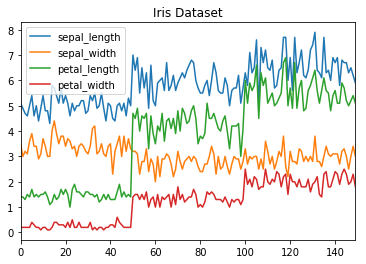

In [31]:
iris.drop(['species'], axis=1).plot.line(title='Iris Dataset')

##### Histogram
In Pandas, we can create a Histogram with the plot.hist method. There aren’t any required arguments but we can optionally pass some like the bin size.

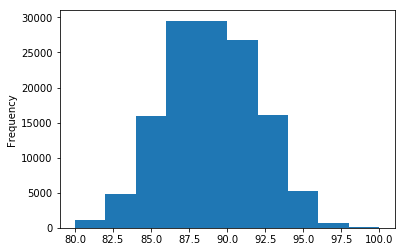

In [33]:
wine['points'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023657CDBC18>,
      dtype=object)

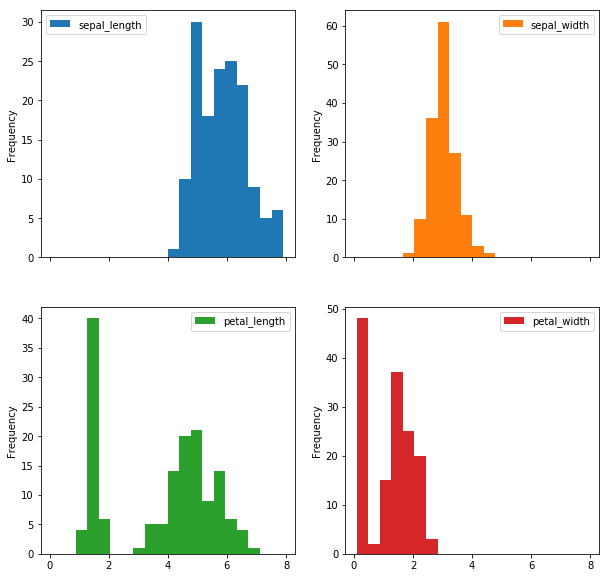

In [35]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10,10), bins=20)

##### Bar Chart
To plot a bar-chart we can use the plot.bar() method, but before we can call this we need to get our data. For this we will first count the occurrences using the value_count() method and then sort the occurrences from smallest to largest using the sort_index() method.

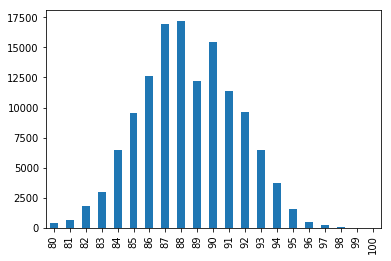

In [37]:
wine['points'].value_counts().sort_index().plot.bar()

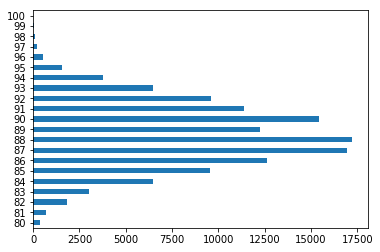

In [38]:
wine['points'].value_counts().sort_index().plot.barh()

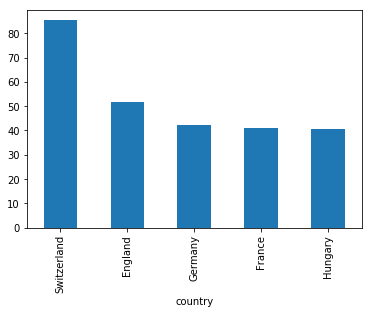

In [42]:
wine.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

# Seaborn
Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating attractive graphs.
Seaborn has a lot to offer. You can create graphs in one line that would take you multiple tens of lines in Matplotlib. Its standard designs are awesome and it also has a nice interface for working with pandas dataframes.

##### Scatter plot
We can use the .scatterplot method for creating a scatterplot, and just as in Pandas we need to pass it the column names of the x and y data, but now we also need to pass the data as an additional argument because we aren’t calling the function on the data directly as we did in Pandas.


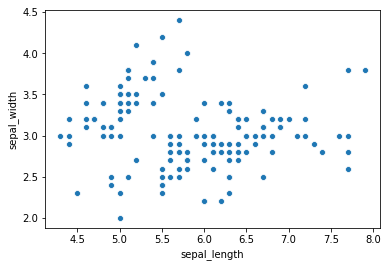

In [43]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

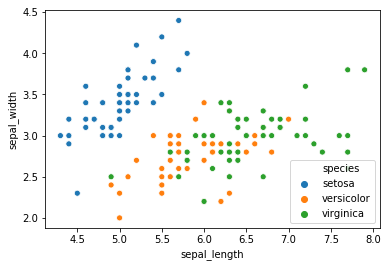

In [45]:
# We can also highlight the points by class using the hue argument, which is a lot 
#easier than in Matplotlib.
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)


##### Line chart
To create a line-chart the sns.lineplot method can be used. The only required argument is the data, which in our case are the four numeric columns from the Iris dataset. We could also use the sns.kdeplot method which rounds of the edges of the curves and therefore is cleaner if you have a lot of outliers in your dataset.


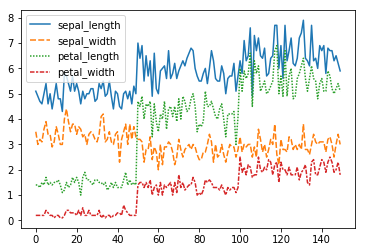

In [47]:
sns.lineplot(data=iris.drop(['species'], axis=1))

##### Histogram
To create a histogram in Seaborn we use the sns.distplot method. We need to pass it the column we want to plot and it will calculate the occurrences itself. We can also pass it the number of bins, and if we want to plot a gaussian kernel density estimate inside the graph.


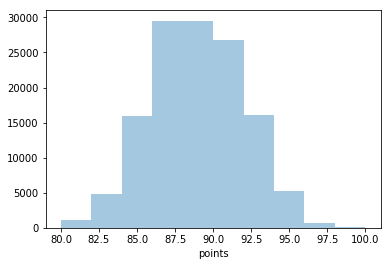

In [50]:
sns.distplot(wine['points'], bins=10, kde=False)

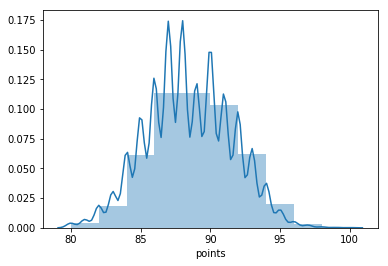

In [51]:
sns.distplot(wine['points'], bins=10, kde=True)

##### Bar chart
In Seaborn a bar-chart can be created using the sns.countplot method and passing it the data.

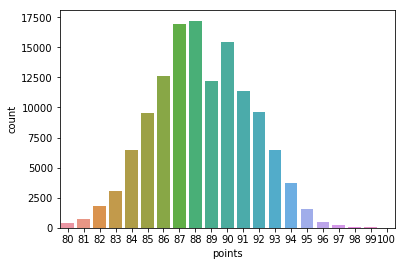

In [54]:
sns.countplot(wine['points'])

# Other graphs
Now that you have a basic understanding of the Matplotlib, Pandas Visualization and Seaborn syntax I want to show you a few other graph types that are useful for extracting insides.
For most of them, Seaborn is the go-to library because of its high-level interface that allows for the creation of beautiful graphs in just a few lines of code.

###### Box plots
A Box Plot is a graphical method of displaying the five-number summary. We can create box plots using seaborns sns.boxplot method and passing it the data as well as the x and y column name.

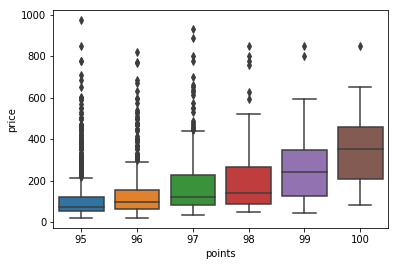

In [56]:
df = wine[(wine['points'] >= 95) & (wine['price']<1000)]
sns.boxplot('points', 'price', data=df)

Box Plots, just like bar-charts are great for data with only a few categories but can get messy really quickly.

##### Heatmap
A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset.
To get the correlation of the features inside a dataset we can call <strong>dataset_name.corr()</strong>, which is a Pandas dataframe method. This will give us the correlation matrix.
We can now use either Matplotlib or Seaborn to create the heatmap.

In [59]:
import numpy as np

[None, None, None, None, None, None, None, None]

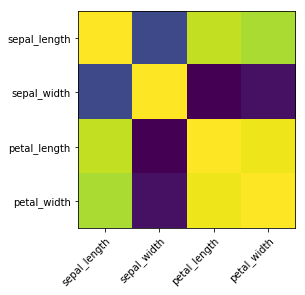

In [66]:
# get correlation matrix
corr_matrix = iris.corr()

fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr_matrix.values)
ax.set_xticks(np.arange(len(corr_matrix)))
ax.set_yticks(np.arange(len(corr_matrix)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


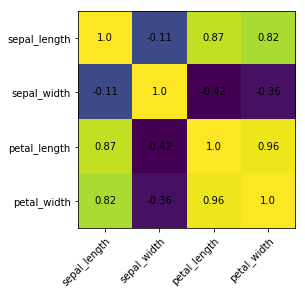

In [71]:
# To add notations to the heatmap we need to add two for loops:
corr_matrix = iris.corr()
fig, ax = plt.subplots()

im = ax.imshow(corr_matrix.values)
ax.set_xticks(np.arange(len(corr_matrix)))
ax.set_yticks(np.arange(len(corr_matrix)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text notation.
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = ax.text(j, i, np.around(corr_matrix.iloc[i, j], decimals=2), ha='center', va='center',
                      color='black')

###### Seaborn makes it way easier to create a heatmap and add annotations:

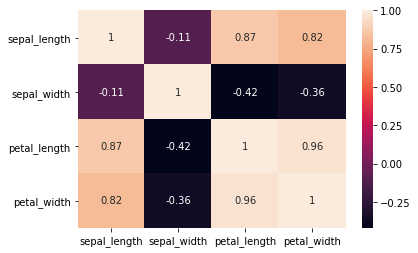

In [72]:
sns.heatmap(iris.corr(), annot=True)

##### Faceting
Faceting is the act of breaking data variables up across multiple subplots and combining those subplots into a single figure.
Faceting is really helpful if you want to quickly explore your dataset.
To use one kind of faceting in Seaborn we can use the FacetGrid. First of all, we need to define the FacetGrid and pass it our data as well as a row or column, which will be used to split the data. Then we need to call the map function on our FacetGrid object and define the plot type we want to use, as well as the column we want to graph.


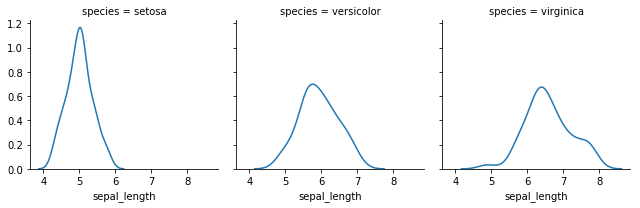

In [74]:
g = sns.FacetGrid(iris, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

##### Pairplot
Lastly, I will show you Seaborns pairplot and Pandas scatter_matrix , which enable you to plot a grid of pairwise relationships in a dataset.

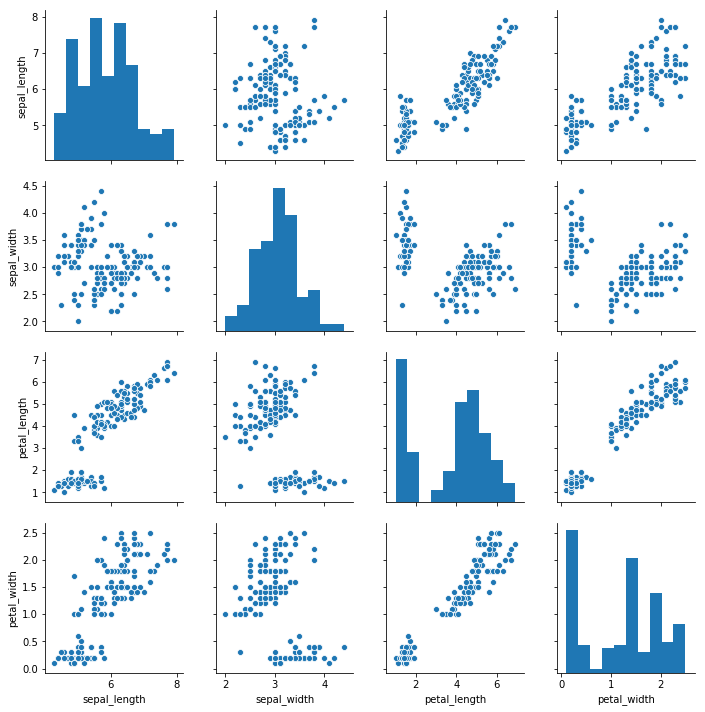

In [75]:
sns.pairplot(iris)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023653E53550>,
      dtype=object)

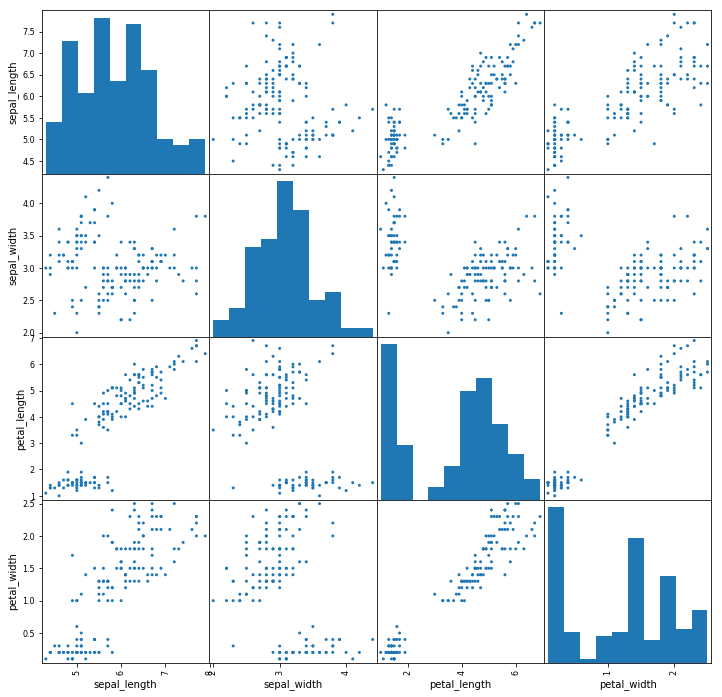

In [76]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax)

<strong> Link artigo original:</strong>
<a href='https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed'> Introduction to Data Visualization in Python</a> 